In [1]:
# Dependencies
import openweathermapy.core as owm
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
import gzip
import json


#config
from OWM_config import api_key

In [2]:
# Create settings dictionary with information we're interested in
settings = {"units": "Imperial", "appid": api_key}

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}"

#print(query_url)

In [4]:
# read json from city.list.json.gz 
# http://openweathermap.org/help/city_list.txt
with gzip.open("city.list.json.gz", "rt", encoding="utf-8") as f:
   d = f.read()
   f = json.loads(d)
   citydata_df = pd.DataFrame(f)

# split latitude and longitude into separate dataframes
citylatlist = []
citylonlist = []

for i in citydata_df['coord']:
    citylonlist.append(i['lon'])
    citylatlist.append(i['lat'])


In [5]:
lattemp = []
cities = []
citylat = []
citytemp = []
cityhumidity = []
citywind = []
citycloudiness = []
citylogurl = []
citylogcode = []
citylogname = []

for row in citydata_df['coord'].sample(n=500):
    #print(row['lat'], row['lon'])
    
    lon=row['lon']
    lat=row['lat']
    
    query_url1 = f"{query_url}&lat={lat}&lon={lon}"
        
    response = requests.get(query_url1).json()
    
    cities.append(response['name'])
    citylat.append(response['coord']['lat'])
    citytemp.append(response['main']['temp'])
    cityhumidity.append(response['main'] ['humidity'])
    citywind.append(response['wind'] ['speed'])
    
    #for weather in response['weather']:
    #   citycloudiness.append(weather['main'])
    #   print(weather['main'])
    citycloudiness.append(response['clouds'] ['all'])
    
    # print city number, city name, and requested URL.
    #print(query_url1)
    #print("City number:" + str(response['id']) + "\t City Name:" + response['name'])
    
    citylogurl.append(query_url1)
    citylogcode.append(str(response['id']))
    citylogname.append(response['name'])
    
    
    lon=''
    lat=''
    query_url1=''


##  print log of each city as it's being processed with the city number, city name, and requested URL

In [7]:
citylog_df = pd.DataFrame({
    "url": citylogurl,
    "citycode":citylogcode,
    "cityname":citylogname
})

citylog_df.to_csv("cityweatherdata.csv", encoding="utf-8", index=False)


## Temperature (F) vs. Latitude

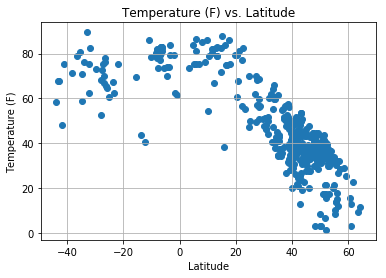

In [8]:
weather_data = {"city": cities, "latitude": citylat, "temperature": citytemp}
weather_data = pd.DataFrame(weather_data)
weather_data

# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("PressureInWorldCities.png")

# Show plot
plt.show()

## Humidity (%) vs. Latitude

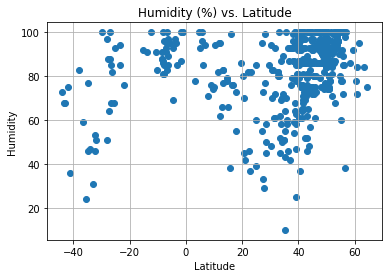

In [9]:
weather_data = {"city": cities, "latitude": citylat, "humidity": cityhumidity}
weather_data = pd.DataFrame(weather_data)
weather_data

# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Cloudiness (%) vs. Latitude

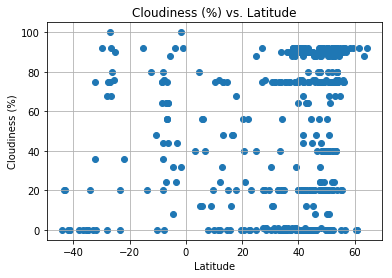

In [10]:
weather_data = {"city": cities, "latitude": citylat, "all": citycloudiness}
weather_data = pd.DataFrame(weather_data)
weather_data

# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["all"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Wind Speed (mph) vs. Latitude

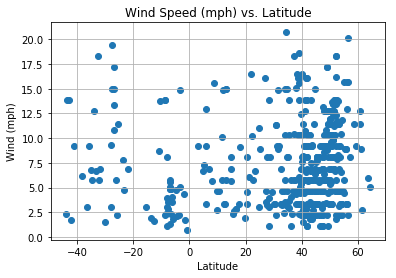

In [11]:
weather_data = {"city": cities, "latitude": citylat, "wind": citywind}
weather_data = pd.DataFrame(weather_data)
weather_data

# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()


In [ ]:
# Observations
# The closer a country is from the equator, the hotter it will be, since the equator is the hottest spot on earth, because most sunlight hits on the earth year-round. The farther away a country is from the equator, the colder it will be.
# Humidity is at a maximum in the Tropics and declines as one moves poleward reaching minimum values in each polar region. 